## Lab 2 
## Ньяти Каелиле БВТ2201

### Question 1: Akinator-like program 

In [1]:
import tkinter as tk
from tkinter import messagebox, simpledialog
import json


class Teacher:
    def __init__(self, name, gender, faculty, department, years_experience, associate_professor, assistant, department_head, head_campus, module):
        self.name = name
        self.gender = gender
        self.faculty = faculty
        self.department = department
        self.years_experience = years_experience
        self.associate_professor = associate_professor
        self.assistant = assistant
        self.department_head = department_head
        self.head_campus = head_campus
        self.module = module

    def to_dict(self):
        return {
            "name": self.name,
            "gender": self.gender,
            "faculty": self.faculty,
            "department": self.department,
            "years_experience": self.years_experience,
            "associate_professor": self.associate_professor,
            "assistant": self.assistant,
            "department_head": self.department_head,
            "head_campus": self.head_campus,
            "module": self.module
        }

    @staticmethod
    def from_dict(data):
        return Teacher(
            name=data["name"],
            gender=data["gender"],
            faculty=data["faculty"],
            department=data["department"],
            years_experience=data["years_experience"],
            associate_professor=data["associate_professor"],
            assistant=data["assistant"],
            department_head=data["department_head"],
            head_campus=data["head_campus"],
            module=data["module"]
        )

# File to store teacher data
DATA_FILE = "teachers.json"

# Load teacher database from JSON file
def load_teachers():
    with open(DATA_FILE, "r", encoding="utf-8") as f:
        data = json.load(f)
        return [Teacher.from_dict(entry) for entry in data["teachers"]]
    
# Save teacher database to JSON file
def save_teachers(teachers):
    with open(DATA_FILE, "w", encoding="utf-8") as f:
        json.dump({"teachers": [teacher.to_dict() for teacher in teachers]}, f, ensure_ascii=False, indent=4)


class ExpertSystemApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Teacher Identification Expert System: MTUCI")

        self.teacher_db = load_teachers()
        self.possible_teachers = self.teacher_db[:]
        self.question_index = 0
        self.user_answers = {}

        # list of questions and attributes
        self.questions = [
            # Question 1
            ("Is the person in question Male or Female?", "gender", ["Male", "Female"]),

            # Question 2
            ("Which faculty does the person in question work under?", "faculty", [
                "Information Technology",
                "Cybernetics and Information Security"
            ]),

            # Question 3
            ("Which department does the person in question belong to?", "department", [
                "Mathematical Cybernetics and IT",
                "Corporate Information Systems",
                "Mathematical Analysis",
                "Probability and Applied Mathematics",
                "Physical Education"
            ]),

            # Question 4
            ("Does the teacher have more than 10 years of experience?", "years_experience", 10),

            # Question 5
            ("Is the person in question an Associate Professor?", "associate_professor", True),

            # Question 6
            ("Is the person in question an Assistant instead?", "assistant", True),

            # Question 7
            ("Is the person in question the head of their department?", "department_head", True),

            # Question 8
            ("In which campus is the person in question located?", "head_campus", [
                "Narodnoe Opolchenie",
                "Aviamatornaya",
                "Both"
            ]),

            # Question 9
            ("Which module is the person in question leading or teaching?", "module", [
                "Information Technology and Programming",
                "Structure and Algorithms for Data Processing",
                "Practical Project",
                "Discrete Mathematics",
                "Higher Mathematics",
                "Mathematical Methods in Big Data",
                "None",
                "Probability and Statistics",
                "Sport",
                "Databases"
            ])
        ]

        self.question_label = tk.Label(self.root, text="", wraplength=400, justify="left")
        self.question_label.pack(pady=20)

        # Yes/No buttons
        self.yes_button = tk.Button(self.root, text="Yes", width=15, command=lambda: self.answer_question(True))
        self.no_button = tk.Button(self.root, text="No", width=15, command=lambda: self.answer_question(False))

        # Multiple option buttons
        self.option_buttons = []

        # Initially pack Yes/No buttons
        self.yes_button.pack(side=tk.LEFT, padx=10)
        self.no_button.pack(side=tk.RIGHT, padx=10)

        self.next_question()

    def answer_question(self, answer):
        question_data = self.questions[self.question_index]
        attribute = question_data[1]
        value = question_data[2]

        self.user_answers[attribute] = answer

        if isinstance(value, int):  # Numerical comparison (years of experience)
            if answer:
                self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) >= value]
            else:
                self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) < value]
        else:
            if answer in ["Male", "Female"]:
                # This handles the gender question specifically
                self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) == answer]
            elif attribute in ["faculty", "department", "head_campus", "module"]:
                # These are handled via option buttons, so no need to filter here
                pass
            else:
                if answer:
                    self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) == value]
                else:
                    self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) != value]

        self.check_remaining_teachers()

    def answer_option(self, option):
        question_data = self.questions[self.question_index]
        attribute = question_data[1]

        self.user_answers[attribute] = option

        self.possible_teachers = [t for t in self.possible_teachers if getattr(t, attribute) == option]

        self.check_remaining_teachers()

    def check_remaining_teachers(self):
        if len(self.possible_teachers) == 1:
            self.show_result(self.possible_teachers[0].name)
        elif len(self.possible_teachers) == 0:
            self.add_teacher()
        elif self.question_index + 1 < len(self.questions):
            self.question_index += 1
            self.next_question()
        else:
            self.show_result_multiple()

    def next_question(self):
        # Clear any existing option buttons
        for btn in self.option_buttons:
            btn.destroy()
        self.option_buttons = []

        if self.question_index < len(self.questions):
            question_data = self.questions[self.question_index]
            self.question_label.config(text=question_data[0])

            if isinstance(question_data[2], list):
                # Show options for the user to select (for departments)
                for option in question_data[2]:
                    btn = tk.Button(self.root, text=option, width=30, wraplength=200, justify="left",
                                   command=lambda opt=option: self.answer_option(opt))
                    btn.pack(pady=5)
                    self.option_buttons.append(btn)
                # Hide Yes/No buttons in this case
                self.yes_button.pack_forget()
                self.no_button.pack_forget()
            else:
                # Show Yes/No buttons for binary questions
                self.yes_button.pack(side=tk.LEFT, padx=10)
                self.no_button.pack(side=tk.RIGHT, padx=10)

    def show_result(self, teacher_name):
        messagebox.showinfo("Result", f"The teacher you're thinking of is:\n\n{teacher_name}")
        self.root.quit()

    def show_result_multiple(self):
        if len(self.possible_teachers) > 1:
            possible_names = [t.name for t in self.possible_teachers]
            names_str = "\n".join(possible_names)
            messagebox.showinfo("Result", f"Possible teachers are:\n\n{names_str}")
        else:
            messagebox.showinfo("Result", "No matching teacher found.")
            self.add_teacher()
        self.root.quit()

    def add_teacher(self):
        add_teacher = messagebox.askyesno("Add Teacher", "No matching teacher found. Would you like to add this teacher?")
        if add_teacher:
            name = simpledialog.askstring("Input", "Enter the teacher's name:")
            if not name:
                messagebox.showerror("Error", "Name cannot be empty.")
                return

            # Ask for years of experience and convert to integer
            years_experience_str = simpledialog.askstring("Input", "Enter the number of years of experience:")
            if years_experience_str is None or not years_experience_str.isdigit():
                messagebox.showerror("Error", "Please enter a valid number for years of experience.")
                return
            years_experience = int(years_experience_str)

            gender = self.user_answers.get("gender", "Unknown")
            faculty = self.user_answers.get("faculty", "Unknown")
            department = self.user_answers.get("department", "Unknown")
            associate_professor = self.user_answers.get("associate_professor", False)
            assistant = self.user_answers.get("assistant", False)
            department_head = self.user_answers.get("department_head", False)
            head_campus = self.user_answers.get("head_campus", "Unknown")
            module = self.user_answers.get("module", "None")

            # Handle cases where the answer might not have been set
            if isinstance(gender, bool):
                gender = "Male" if gender else "Female"  
            if isinstance(head_campus, bool):
                head_campus = "Aviamatornaya" if head_campus else "Narodnoe Opolchenie"
             
            new_teacher = Teacher(
                name=name,
                gender=gender,
                faculty=faculty,
                department=department,
                years_experience=years_experience,
                associate_professor=associate_professor,
                assistant=assistant,
                department_head=department_head,
                head_campus=head_campus,
                module=module
            )

            self.teacher_db.append(new_teacher)
            save_teachers(self.teacher_db)
            messagebox.showinfo("Teacher Added", f"Teacher '{name}' has been added to the database.")

        self.root.quit()

# Create the main window
def main():
    root = tk.Tk()
    app = ExpertSystemApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()


### *Question 2: Quadratic Tree*

Selected Point: (3, 2)
Closest Three Neighbors:
  Closest 1: (3, 1)
  Closest 2: (3, 4)
  Closest 3: (3, 0)


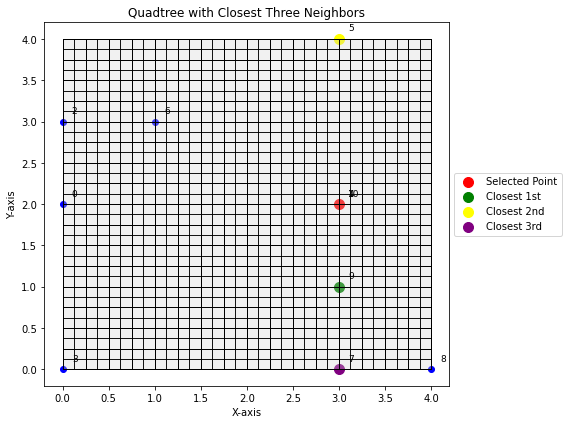

In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the size of the grid
grid_size = 4
num_points = 11

# Generate random points
points = {i: (random.randint(0, grid_size), random.randint(0, grid_size)) for i in range(num_points)}

# Function to visualize points and quadtree subdivisions
def draw_quadtree(x_min, x_max, y_min, y_max, depth=0):
    # Highlight the first big four quadrants
    if depth == 0:
        plt.fill([0, 0, grid_size / 2, grid_size / 2], [0, grid_size / 2, grid_size / 2, 0], 'lightgrey', alpha=0.3)
        plt.fill([grid_size / 2, grid_size / 2, grid_size, grid_size], [0, grid_size / 2, grid_size / 2, 0], 'lightgrey', alpha=0.3)
        plt.fill([0, 0, grid_size / 2, grid_size / 2], [grid_size / 2, grid_size, grid_size, grid_size / 2], 'lightgrey', alpha=0.3)
        plt.fill([grid_size / 2, grid_size / 2, grid_size, grid_size], [grid_size / 2, grid_size, grid_size, grid_size / 2], 'lightgrey', alpha=0.3)
    
    if depth > 5:  # Arbitrary depth limit
        return

    # Draw the current boundary (subdivision)
    plt.plot([x_min, x_max], [y_min, y_min], 'k-', lw=0.7)  # Bottom boundary
    plt.plot([x_min, x_max], [y_max, y_max], 'k-', lw=0.7)  # Top boundary
    plt.plot([x_min, x_min], [y_min, y_max], 'k-', lw=0.7)  # Left boundary
    plt.plot([x_max, x_max], [y_min, y_max], 'k-', lw=0.7)  # Right boundary

    # Mid points for next level
    x_mid = (x_min + x_max) / 2
    y_mid = (y_min + y_max) / 2

    # Recursively subdivide into four quadrants
    draw_quadtree(x_min, x_mid, y_min, y_mid, depth + 1)
    draw_quadtree(x_mid, x_max, y_min, y_mid, depth + 1)
    draw_quadtree(x_min, x_mid, y_mid, y_max, depth + 1)
    draw_quadtree(x_mid, x_max, y_mid, y_max, depth + 1)

# Function to plot the points on the grid
def plot_points(points, color='blue'):
    for p_id, (x, y) in points.items():
        plt.scatter(x, y, color=color)
        plt.text(x + 0.1, y + 0.1, str(p_id), fontsize=9)

# Function to find neighbors, including diagonals
def find_closest_neighbors(point, points):
    # Calculate the Euclidean distance to find the closest points
    distances = []
    for p_id, p_coord in points.items():
        if p_coord != point:
            dist = euclidean_distance(point, p_coord)
            distances.append((p_coord, dist))
    
    # Sort based on the shortest distances
    distances.sort(key=lambda x: x[1])
    
    # Return only the three closest points
    return [distances[i][0] for i in range(3)]

# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Function to plot closest neighbors
def plot_neighbors(point, neighbors):
    plt.scatter(point[0], point[1], color='red', label='Selected Point', s=100)

    if len(neighbors) >= 1:
        plt.scatter(neighbors[0][0], neighbors[0][1], color='green', label='Closest 1st', s=100)
    if len(neighbors) >= 2:
        plt.scatter(neighbors[1][0], neighbors[1][1], color='yellow', label='Closest 2nd', s=100)
    if len(neighbors) >= 3:
        plt.scatter(neighbors[2][0], neighbors[2][1], color='purple', label='Closest 3rd', s=100)

# Main visualization function
def visualize_quadtree_and_neighbors(points):
    # Create a new plot
    plt.figure(figsize=(8, 6))
    
    # Draw quadtree subdivisions
    draw_quadtree(0, grid_size, 0, grid_size)

    # Plot the points on the grid
    plot_points(points)

    # Randomly select a point from the generated points
    random_point = random.choice(list(points.values()))

    # Find and plot the closest three neighbors of the random point
    closest_neighbors = find_closest_neighbors(random_point, points)
    plot_neighbors(random_point, closest_neighbors)

    # Print the neighbors in the terminal
    print(f"Selected Point: {random_point}")
    print("Closest Three Neighbors:")
    for idx, neighbor in enumerate(closest_neighbors, 1):
        print(f"  Closest {idx}: {neighbor}")

    # Add labels
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Quadtree with Closest Three Neighbors")

    # Move the legend (key) to the right side, outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.tight_layout()
    plt.show()

# Run the visualization with printed output
visualize_quadtree_and_neighbors(points)
